1) арлоў у сярэднім выпадае:  50
2) з імавернасцю  0.017704  выпадзе больш за 60 арлоў


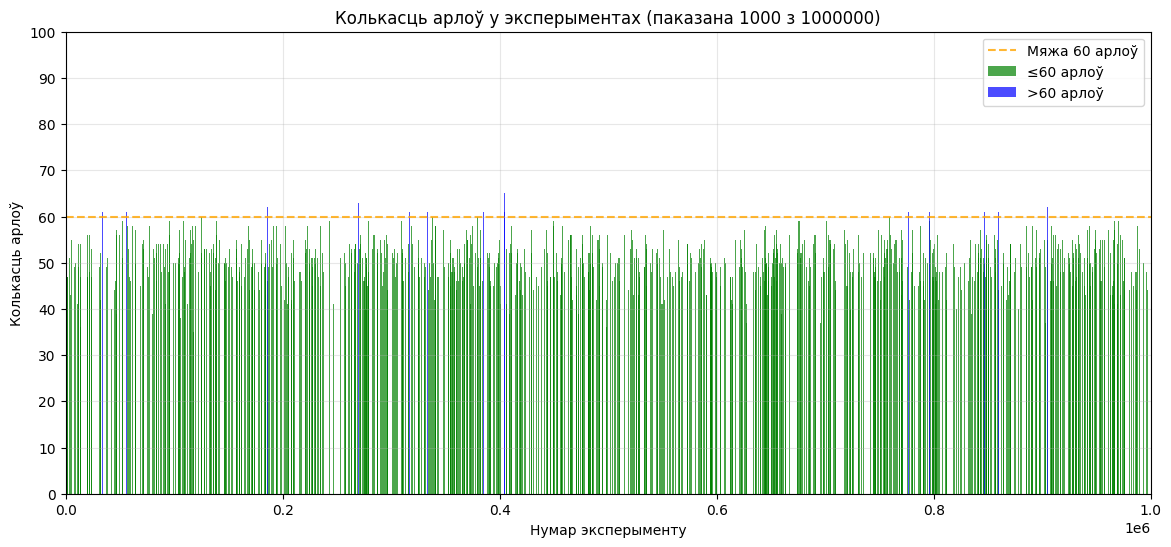

3) Імавернасці для інтэрвалаў:
0-9 арлоў: 0.000000 (0.0000%)
10-19 арлоў: 0.000000 (0.0000%)
20-29 арлоў: 0.000022 (0.0022%)
30-39 арлоў: 0.017552 (1.7552%)
40-49 арлоў: 0.442293 (44.2293%)
50-59 арлоў: 0.511760 (51.1760%)
60-69 арлоў: 0.028331 (2.8331%)
70-79 арлоў: 0.000042 (0.0042%)
80-89 арлоў: 0.000000 (0.0000%)
90-100 арлоў: 0.000000 (0.0000%)


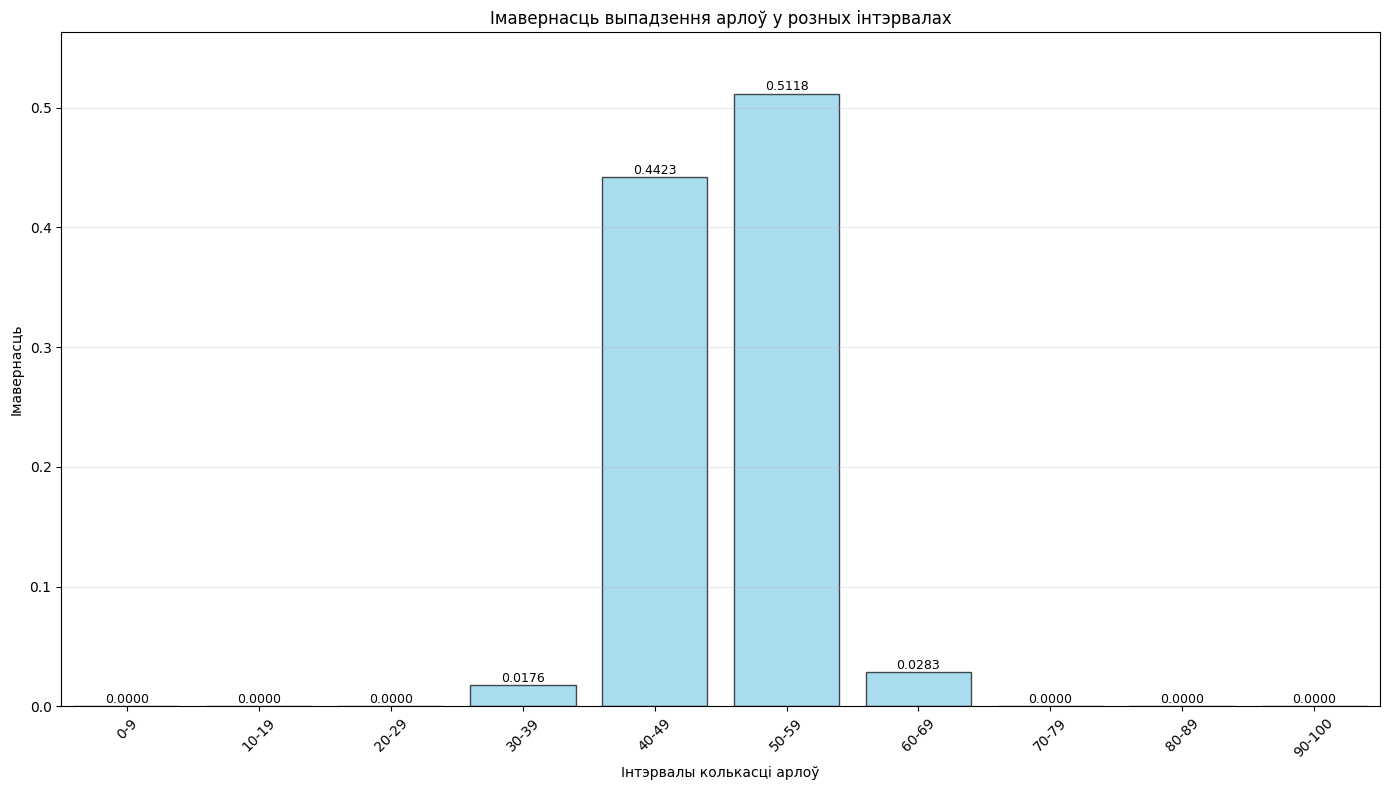

4) Знойдзены 95% інтэрвал: [40, 60]
Фактычная імавернасць: 0.964722 (96.4722%)


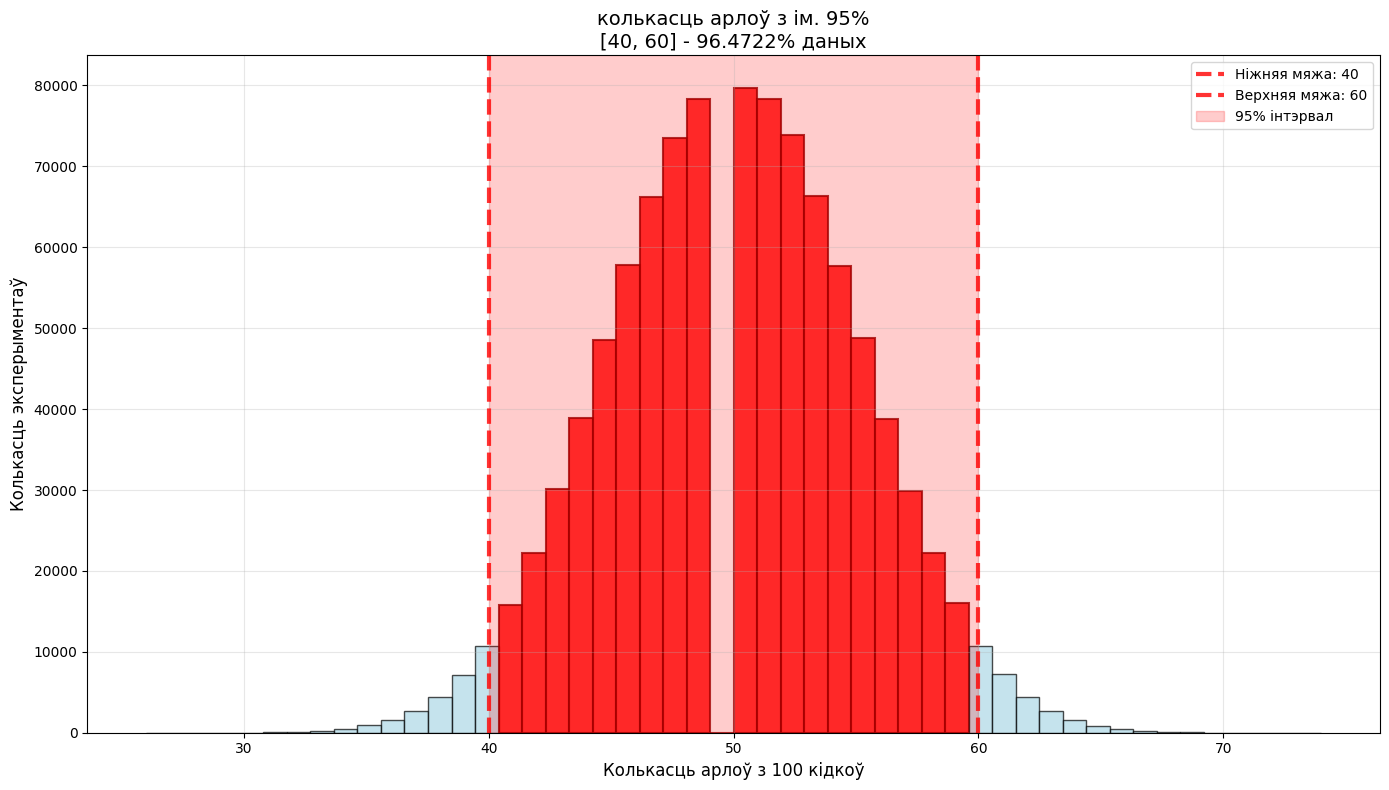

5) з імавернасцю  0.809289 выпадуць 5 арлоў запар


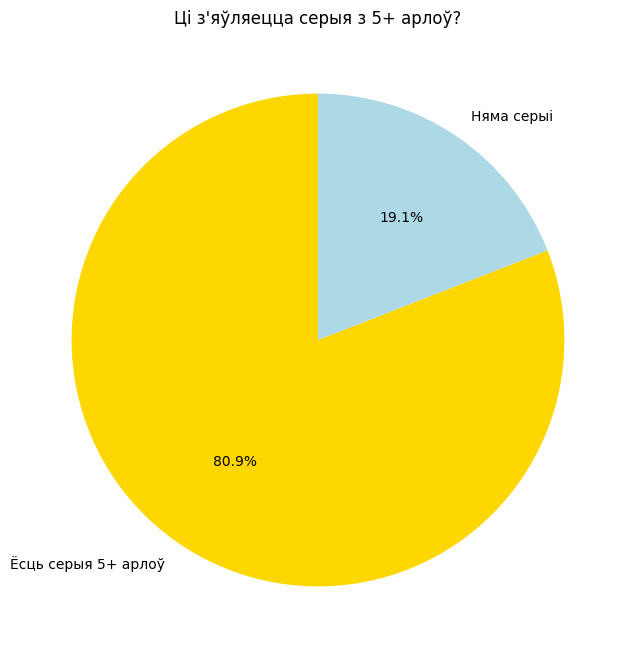

Аналіз залежнасці ад p...
Апрацоўка p = 0.10 (1/17)
Апрацоўка p = 0.15 (2/17)
Апрацоўка p = 0.20 (3/17)
Апрацоўка p = 0.25 (4/17)
Апрацоўка p = 0.30 (5/17)
Апрацоўка p = 0.35 (6/17)
Апрацоўка p = 0.40 (7/17)
Апрацоўка p = 0.45 (8/17)
Апрацоўка p = 0.50 (9/17)
Апрацоўка p = 0.55 (10/17)
Апрацоўка p = 0.60 (11/17)
Апрацоўка p = 0.65 (12/17)
Апрацоўка p = 0.70 (13/17)
Апрацоўка p = 0.75 (14/17)
Апрацоўка p = 0.80 (15/17)
Апрацоўка p = 0.85 (16/17)
Апрацоўка p = 0.90 (17/17)


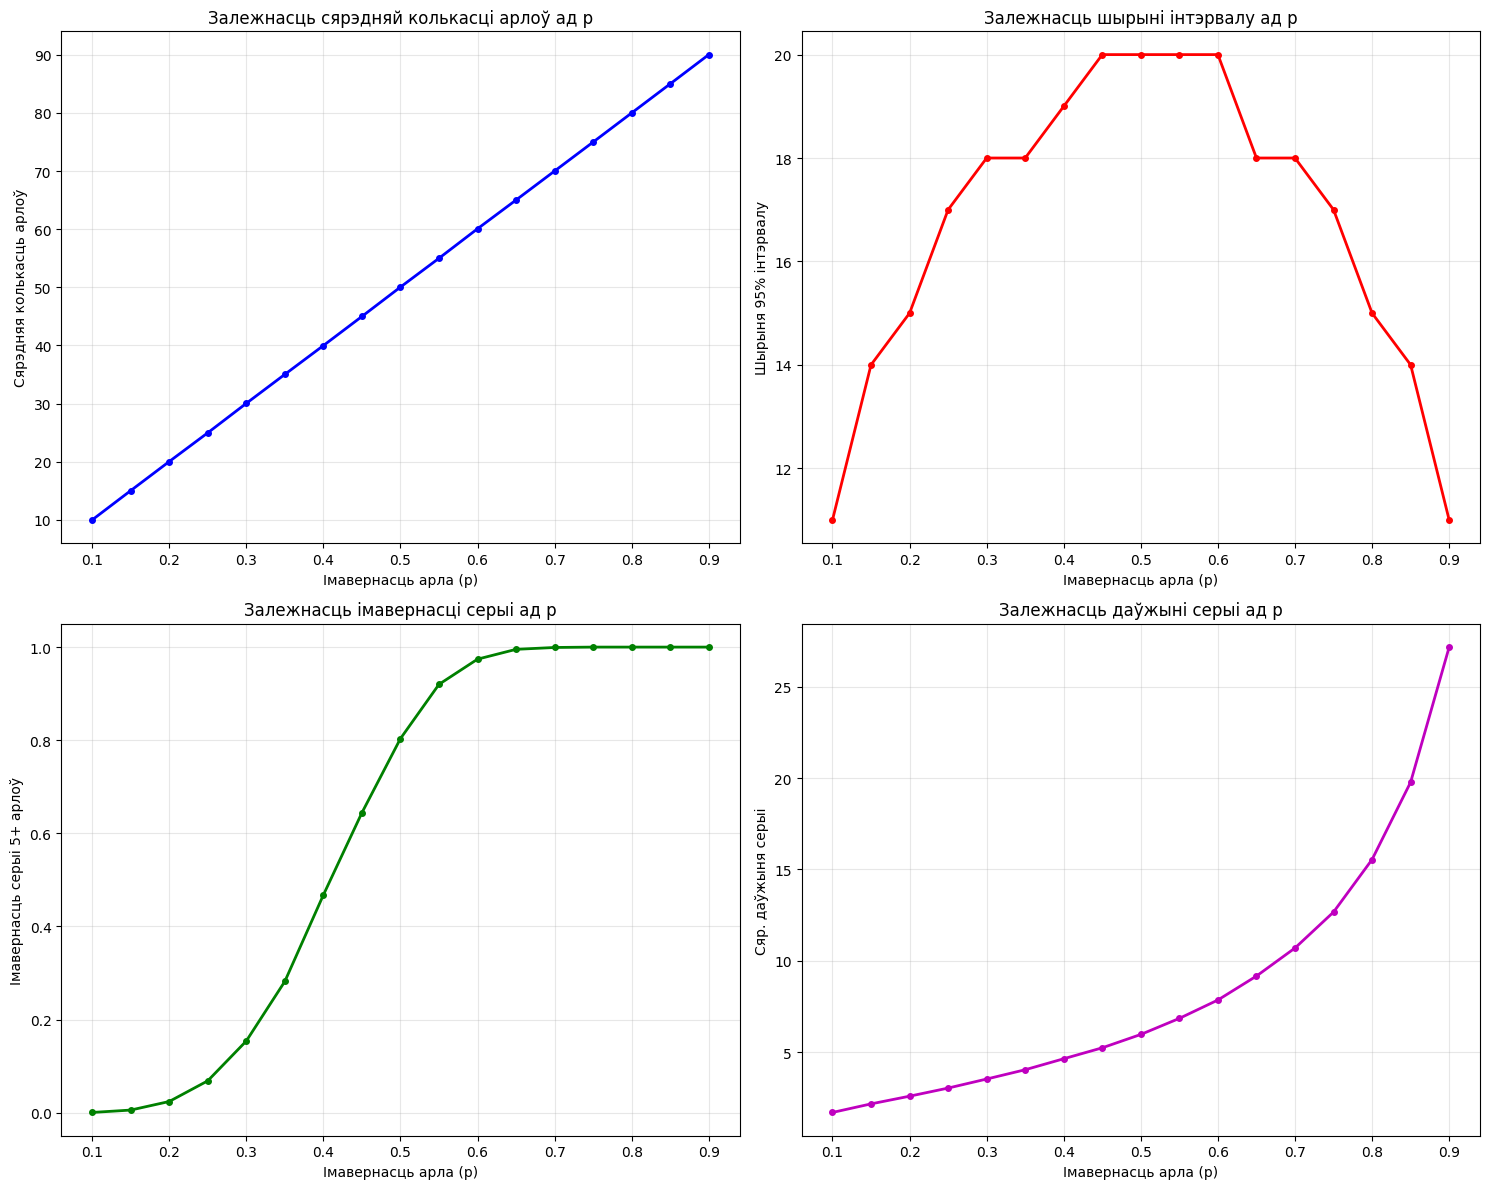

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

def randomCoin():
    random_number = random.random()
    if random_number < 0.5:
        return 0
    else:
        return 1
    
def randFullExpir():
    millTimes = []
    for i in range(1000000):
        curAmount = 0
        for j in range(100):
            number = randomCoin()
            curAmount += number
        millTimes.append(curAmount)
    return millTimes

def averageNumb_more60(millTimes):
    sum = 0    
    m60 = 0
    total = len(millTimes)
    for i in millTimes:
        sum += i
        if i > 60:
            m60 += 1
    sum/=total
    rSum = round(sum)
    prob60 = m60/total
    print("1) арлоў у сярэднім выпадае: ", rSum)
    print("2) з імавернасцю ", prob60, " выпадзе больш за 60 арлоў")

    sample_size = 1000
    # Бярэм толькі 1000 выпадковых эксперыментаў
    indices = random.sample(range(len(millTimes)), sample_size)
    x_sample = indices
    y_sample = [millTimes[i] for i in indices]
    
    plt.figure(figsize=(14, 6))
    
    x_normal = []
    y_normal = []    
    x_highlight = []
    y_highlight = []
    
    for i, amount in zip(x_sample, y_sample):
        if amount > 60:
            x_highlight.append(i)
            y_highlight.append(amount)
        else:
            x_normal.append(i)
            y_normal.append(amount)
    
    if x_normal:
        plt.bar(x_normal, y_normal, alpha=0.7, color='green', width=800, label='≤60 арлоў')
    if x_highlight:
        plt.bar(x_highlight, y_highlight, alpha=0.7, color='blue', width=800, label='>60 арлоў')
    
    plt.xlim(0, 1000000)
    plt.ylim(0, 100)
    plt.xticks([0, 200000, 400000, 600000, 800000, 1000000])
    plt.yticks(range(0, 101, 10))
    
    plt.axhline(y=60, color='orange', linestyle='--', alpha=0.8, label='Мяжа 60 арлоў')
    
    plt.xlabel('Нумар эксперыменту')
    plt.ylabel('Колькасць арлоў')
    plt.title(f'Колькасць арлоў у эксперыментах (паказана {sample_size} з 1000000)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

def probInterv(millTimes):
    k10 = k20 = k30 = k40 = k50 = k60 = k70 = k80 = k90 = k100 = 0
    for i in millTimes:
        if i < 10:
            k10+=1
        if 10 <= i < 20:
            k20+=1
        if 20 <= i < 30:
            k30+=1
        if 30 <= i < 40:
            k40+=1
        if 40 <= i < 50:
            k50+=1
        if 50 <= i < 60:
            k60+=1
        if 60 <= i < 70:
            k70+=1
        if 70 <= i < 80:
            k80+=1
        if 80 <= i < 90:
            k90+=1
        if i > 90:
            k100+=1
    total = len(millTimes)
    probabilities = [k10/total, k20/total, k30/total, k40/total, k50/total, k60/total, k70/total, k80/total, k90/total, k100/total]
    intervals = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"]
    
    print("3) Імавернасці для інтэрвалаў:")
    for i, prob in enumerate(probabilities):
        print(f"{intervals[i]} арлоў: {prob:.6f} ({prob*100:.4f}%)")
    
    plt.figure(figsize=(14, 8))
    
    intervals_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    interval_centers = [(intervals_bins[i] + intervals_bins[i+1])/2 for i in range(len(intervals_bins)-1)]
    
    bars = plt.bar(interval_centers, probabilities, width=8, alpha=0.7, 
                   color='skyblue', edgecolor='black', linewidth=1)
    
    for bar, prob in zip(bars, probabilities):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.0001,
                f'{prob:.4f}', ha='center', va='bottom', fontsize=9)
    
    plt.xlim(0, 100)
    plt.ylim(0, max(probabilities) * 1.1)
    plt.xticks(interval_centers, intervals, rotation=45)
    plt.ylabel('Імавернасць')
    plt.xlabel('Інтэрвалы колькасці арлоў')
    plt.title('Імавернасць выпадзення арлоў у розных інтэрвалах')
    plt.grid(alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

def prob95Proz (millTimes):
    sortedMas = sorted(millTimes)
    total = len(millTimes)
    ai = int(0.025 * total)
    bi = int(0.975 * total)

    a = sortedMas[ai]
    b = sortedMas[bi]

    interval = sum(1 for x in millTimes if a <= x <= b)
    curProb = interval / len(millTimes)
    
    print(f"4) Знойдзены 95% інтэрвал: [{a}, {b}]")
    print(f"Фактычная імавернасць: {curProb:.6f} ({curProb*100:.4f}%)")
    plt.figure(figsize=(14, 8))
    
    n, bins, patches = plt.hist(millTimes, bins=50, alpha=0.7, color='lightblue', 
                                edgecolor='black', density=False)
    
    for i, patch in enumerate(patches):
        bin_center = (bins[i] + bins[i+1]) / 2
        if a <= bin_center <= b:
            patch.set_facecolor('red')
            patch.set_alpha(0.8)
            patch.set_edgecolor('darkred')
            patch.set_linewidth(1.5)
    
    plt.axvline(a, color='red', linestyle='--', linewidth=3, 
                label=f'Ніжняя мяжа: {a}', alpha=0.8)
    plt.axvline(b, color='red', linestyle='--', linewidth=3, 
                label=f'Верхняя мяжа: {b}', alpha=0.8)
    
    plt.axvspan(a, b, alpha=0.2, color='red', label='95% інтэрвал')
    
    in_interval = sum(1 for x in millTimes if a <= x <= b)
    total = len(millTimes)
    
    plt.xlabel('Колькасць арлоў з 100 кідкоў', fontsize=12)
    plt.ylabel('Колькасць эксперыментаў', fontsize=12)
    plt.title(f'колькасць арлоў з ім. 95%\n[{a}, {b}] - {curProb*100:.4f}% даных', fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def prob5Heads(num_experiments=1000000):
    success_count = 0
    all_results = []
    for i in range(num_experiments):
        consecutive_heads = 0
        found_5_in_row = False
        
        for _ in range(100):
            if random.random() < 0.5:
                consecutive_heads += 1
                if consecutive_heads >= 5:
                    found_5_in_row = True
                    break 
            else:
                consecutive_heads = 0
        
        if found_5_in_row:
            success_count += 1
    
    probability = success_count / num_experiments
    
    print("5) з імавернасцю ", probability, "выпадуць 5 арлоў запар")

    plt.figure(figsize=(8, 8))
    
    labels = ['Ёсць серыя 5+ арлоў', 'Няма серыі']
    sizes = [success_count, num_experiments - success_count]
    colors = ['gold', 'lightblue']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title("Ці з'яўляецца серыя з 5+ арлоў?")
    
    plt.show()


def randomCoinP(p):
    random_number = random.random()
    if random_number < p:
        return 1
    else:
        return 0

def randFullExpir_p(p, num_experiments=100000):
    millTimes = []
    for i in range(num_experiments):
        curAmount = 0
        for j in range(100):
            number = randomCoinP(p)
            if number == 1:
                curAmount += 1
        millTimes.append(curAmount)
    return millTimes

def averageNumb_more60_p(millTimes):
    sum_val = 0    
    m60 = 0
    total = len(millTimes)
    for i in millTimes:
        sum_val += i
        if i > 60:
            m60 += 1
    average = sum_val / total
    rSum = round(average)
    prob60 = m60 / total
    return rSum, prob60, average

def prob95Proz_p(millTimes):
    sortedMas = sorted(millTimes)
    curProb = 0
    total = len(millTimes)
    ai = int(0.025 * total)
    bi = int(0.975 * total)

    a = sortedMas[ai]
    b = sortedMas[bi]
    
    interval_width = b - a
    return interval_width, a, b, curProb

def prob5Heads_p(p, num_experiments=10000):
    success_count = 0
    max_series_lengths = []
    
    for i in range(num_experiments):
        consecutive_heads = 0
        max_consecutive = 0
        found_5_in_row = False
        
        for _ in range(100):
            if random.random() < p:
                consecutive_heads += 1
                max_consecutive = max(max_consecutive, consecutive_heads)
                if consecutive_heads >= 5:
                    found_5_in_row = True
            else:
                consecutive_heads = 0
        
        if found_5_in_row:
            success_count += 1
        max_series_lengths.append(max_consecutive)
    
    probability = success_count / num_experiments
    avg_max_series = np.mean(max_series_lengths)
    
    return probability, avg_max_series

def allP():
    p_values = np.linspace(0.1, 0.9, 17)  # p ад 0.1 да 0.9
    num_experiments = 10000  #менш эксперыментаў для хуткасці
    
    results = {
        'p': p_values,
        'avg_heads': [],
        'interval_widths': [],
        'prob_5_series': [],
        'avg_max_series': []
    }
    
    print("Аналіз залежнасці ад p...")
    
    for i, p in enumerate(p_values):
        print(f"Апрацоўка p = {p:.2f} ({i+1}/{len(p_values)})")
        
        # Генеруем даныя
        millTimesP = randFullExpir_p(p, num_experiments)
        
        # 1. Сярэдняя колькасць арлоў
        rSum, prob60, avg_heads = averageNumb_more60_p(millTimesP)
        results['avg_heads'].append(avg_heads)
        
        # 2. Шырыня 95% інтэрвалу
        interval_width, a, b, curProb = prob95Proz_p(millTimesP)
        results['interval_widths'].append(interval_width)
        
        # 3. Імавернасць серыі з 5+ арлоў і сярэдняя даўжыня серыі
        prob_5, avg_max_series = prob5Heads_p(p, num_experiments)
        results['prob_5_series'].append(prob_5)
        results['avg_max_series'].append(avg_max_series)
    
    plt.figure(figsize=(15, 12))
    
    # сярэдняя колькасць арлоў
    plt.subplot(2, 2, 1)
    plt.plot(results['p'], results['avg_heads'], 'bo-', linewidth=2, markersize=4)
    plt.xlabel('Імавернасць арла (p)')
    plt.ylabel('Сярэдняя колькасць арлоў')
    plt.title('Залежнасць сярэдняй колькасці арлоў ад p')
    plt.grid(alpha=0.3)
    
    # шырыня 95% інтэрвалу
    plt.subplot(2, 2, 2)
    plt.plot(results['p'], results['interval_widths'], 'ro-', linewidth=2, markersize=4)
    plt.xlabel('Імавернасць арла (p)')
    plt.ylabel('Шырыня 95% інтэрвалу')
    plt.title('Залежнасць шырыні інтэрвалу ад p')
    plt.grid(alpha=0.3)
    
    # імавернасць серыі з 5+ арлоў
    plt.subplot(2, 2, 3)
    plt.plot(results['p'], results['prob_5_series'], 'go-', linewidth=2, markersize=4)
    plt.xlabel('Імавернасць арла (p)')
    plt.ylabel('Імавернасць серыі 5+ арлоў')
    plt.title('Залежнасць імавернасці серыі ад p')
    plt.grid(alpha=0.3)
    
    # сярэдняя даўжыня найдаўжэйшай серыі
    plt.subplot(2, 2, 4)
    plt.plot(results['p'], results['avg_max_series'], 'mo-', linewidth=2, markersize=4)
    plt.xlabel('Імавернасць арла (p)')
    plt.ylabel('Сяр. даўжыня серыі')
    plt.title('Залежнасць даўжыні серыі ад p')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results

millTimes = randFullExpir()
averageNumb_more60(millTimes)
probInterv(millTimes)
prob95Proz(millTimes)
prob5Heads()
results = allP()

In [8]:
np.random.seed(27)
x1 = np.random.randn(1000)
x2 = np.random.rand(1000)

In [9]:
x1

array([ 1.28560542, -0.30355338,  0.61907566,  0.39599855,  0.22340565,
       -0.05433942, -0.17927633,  0.24283197,  0.82105655,  1.21705366,
        0.55944866,  0.37674294, -0.56113918, -1.00768365,  1.22618323,
       -0.53045651, -0.27548308, -0.29124335, -0.23739459, -0.51034707,
       -0.54585317,  0.45872878,  0.19559004, -0.41765453,  0.37622609,
       -1.21337474,  0.41991704, -2.62169056,  0.72306177, -0.89542115,
       -0.1705928 ,  1.71913411,  2.57186778, -0.19338003,  0.0815112 ,
        0.4563266 , -0.84322883,  1.52675315,  0.44251527,  0.2150255 ,
        0.99682355, -1.14756201,  1.05667825,  0.05682191, -0.02062256,
        0.8116816 , -1.52120902,  0.62090065,  1.80932844,  1.01305513,
        1.13985643,  0.78669271, -0.18563412,  0.29502831,  0.81627848,
        0.38240221, -1.31881963,  2.48550106, -0.03589005, -0.16297557,
       -0.62998181, -0.62822581,  0.24937146, -0.05419848,  0.40815849,
       -0.35709796, -1.370801  , -0.17994834, -0.1530605 , -1.27